## **1. Limpieza datos**

### **Librerías**

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
from difflib import get_close_matches
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

### **Carga del archivo Excel**

In [70]:
# Usando ruta absoluta
ruta_cierre = r"C:\Users\USER\OneDrive - universidadean.edu.co\2. Semestre\Seminario de investigación\Modulo 2\Modelo ML\data\raw\Cierres Cartera.xlsx"
df_cartera = pd.read_excel(ruta_cierre)

In [71]:
df_cartera.shape

(2960, 60)

### **Eliminar variables irrelevantes segun exploración inicial**

In [72]:
df_cartera.drop(columns=['PLAZO UNIDAD TIEMPO', 'FECHA DE NACIMIENTO TITULAR', 'ESTADO CIVIL.1', 'LINEA'], inplace=True)

### **Normalizar columnas categóricas**

#### Normalizar con difflib

In [73]:
from difflib import get_close_matches

# Lista de columnas categóricas a revisar
columnas = [
    'MARCA', 'CLASE', 'NIVEL DE ESTUDIOS', 'TIPO DE SOLICITANTE', 'TIPO DE ID',
    'OCUPACIÓN', 'TIPO DE VIVIENDA', 'ESTADO CIVIL', 'TIPO DE VEHICULO',
    'TIPO DE SERVICIO', 'PRODUCTO'
]

print("Posibles categorías repetidas por similitud ortográfica:\n")

# Umbral de similitud: cuanto más bajo, más estricta es la detección
umbral = 0.85  # Puedes ajustar entre 0.7 - 0.95

for col in columnas:
    categorias = df_cartera[col].dropna().unique().tolist()
    categorias = sorted(set(map(str, categorias)))  # <- Conversión a str

    revisadas = set()
    sospechosas = []

    for cat in categorias:
        similares = get_close_matches(cat, categorias, n=5, cutoff=umbral)
        similares = [s for s in similares if s != cat and s not in revisadas]
        if similares:
            sospechosas.append((cat, similares))
            revisadas.update(similares)

    if sospechosas:
        print(f"{col}:")
        for base, similares in sospechosas:
            print(f"   - '{base}' ↔ {similares}")
    else:
        print(f"{col}: Sin posibles duplicados ortográficos detectados.")



Posibles categorías repetidas por similitud ortográfica:

MARCA:
   - 'CIRTROEN' ↔ ['CITROEN']
   - 'CITROEN' ↔ ['CIRTROEN']
   - 'HYUNDAI' ↔ ['HYUNDAY']
   - 'HYUNDAY' ↔ ['HYUNDAI']
   - 'MERCEDES BENZ' ↔ ['MERCEDEZ BENZ']
   - 'MERCEDEZ BENZ' ↔ ['MERCEDES BENZ']
   - 'PEUGEOT' ↔ ['PUEGEOT']
   - 'PUEGEOT' ↔ ['PEUGEOT']
   - 'REANULT' ↔ ['RENAULT']
   - 'RENAULT' ↔ ['RENAUL', 'REANULT']
   - 'SANGYONG' ↔ ['SSANGYONG']
   - 'SSANGYONG' ↔ ['SANGYONG']
   - 'VOLKSVAGEN' ↔ ['VOLKSWAGEN', 'VOLKSWAGUEN', 'VOLKSWAGENT']
   - 'VOLKSWAGEN' ↔ ['VOLKWAGEN', 'VOLSKWAGEN']
CLASE:
   - 'AITOMOVIL' ↔ ['AUTOMOVIL']
   - 'AUTOMOVIL' ↔ ['AUTOMOVI', 'AUTOMOCIL', 'AITOMOVIL']
   - 'CAMINETA' ↔ ['CAMIONETA', 'CAMIONET']
   - 'CAMIONET' ↔ ['CAMINETA', 'CAMION']
   - 'CAMIONETA' ↔ ['CAMIONERA', 'CAMIOMETA']
   - 'SIN CALSE' ↔ ['SIN CLASE']
   - 'SIN CLASE' ↔ ['SIN CALSE']
NIVEL DE ESTUDIOS: Sin posibles duplicados ortográficos detectados.
TIPO DE SOLICITANTE: Sin posibles duplicados ortográficos detectados.

#### Normalización manual

In [74]:
# -------------------------
# 🔧 Reemplazos en MARCA
# -------------------------
reemplazos_marca = {
    'VOLKSWAGENT': 'VOLKSWAGEN',
    'VOLKWAGEN': 'VOLKSWAGEN',
    'VOLSKWAGEN': 'VOLKSWAGEN',
    'VOLKSVAGEN': 'VOLKSWAGEN',
    'VOLKSWAGUEN': 'VOLKSWAGEN',
    'RENAUL': 'RENAULT',
    'REANULT': 'RENAULT',
    'PUEGEOT': 'PEUGEOT',
    'CIRTROEN': 'CITROEN',
    'HYUNDAY': 'HYUNDAI',
    'MERCEDEZ BENZ': 'MERCEDES BENZ',
    'SANGYONG': 'SSANGYONG'
}
df_cartera['MARCA'] = df_cartera['MARCA'].replace(reemplazos_marca)

# -------------------------
# 🔧 Reemplazos en CLASE
# -------------------------
reemplazos_clase = {
    'AUTOMOVI': 'AUTOMOVIL',
    'AUTOMOCIL': 'AUTOMOVIL',
    'AITOMOVIL': 'AUTOMOVIL',
    'CAMINETA': 'CAMIONETA',
    'CAMIONET': 'CAMIONETA',
    'CAMIOMETA': 'CAMIONETA',
    'CAMIONERA': 'CAMIONETA',
    'SIN CALSE': 'SIN CLASE'
}
df_cartera['CLASE'] = df_cartera['CLASE'].replace(reemplazos_clase)

# -------------------------
# 🟡 Unificación de NO REGISTRA / NO DEFINIDO
# -------------------------
reemplazos_no_registra = {
    'NO REGISTRA': 'SIN INFORMACION',
    'NO DEFINIDO': 'SIN INFORMACION'
}

columnas_con_no_registra = [
    'TIPO DE SOLICITANTE', 'OCUPACIÓN', 'TIPO DE ID',
    'TIPO DE VIVIENDA', 'ESTADO CIVIL'
]

for col in columnas_con_no_registra:
    df_cartera[col] = df_cartera[col].replace(reemplazos_no_registra)



#### Variables categoricas resultantes

In [75]:
cat_cols = df_cartera.select_dtypes(include='object').columns

# Mostrar categorías únicas por variable
for col in cat_cols:
    print(f"\n {col}")
    print(f"  - Total categorías únicas: {df_cartera[col].nunique()}")
    print(f"  - Categorías:\n    {df_cartera[col].unique()}")


 CALIFICACION CARTERA
  - Total categorías únicas: 6
  - Categorías:
    ['A' 'E' 'IN' 'C' 'D' 'B']

 MARCA
  - Total categorías únicas: 43
  - Categorías:
    ['KIA' nan 'RENAULT' 'VOLKSWAGEN' 'CHEVROLET' 'KIA RIO' 'PEUGEOT' 'SUZUKI'
 'NISSAN' 'MAZDA' 'CITROEN' 'FORD' 'DODGE' 'HONDA' 'HYUNDAI' 'TOYOTA'
 'SEAT' 'SUBARU' 'FOTON' 'JAC' 'JMC' 'MITSUBISHI' 'FIAT' 'JETOUR'
 'SSANGYONG' 'DONGFENG' 'KARRY' 'SPORTAGE' 'GREAT WALL' 'AUDI' 'HINO'
 'SHINERAY' 'MITSUBISHI FUSO' 'RAM' 'JEEP' 'DFSK' 'MERCEDES BENZ' 'VOLVO'
 'N' 'BMW' 'KENWORTH' 'SAIL' 'CHANGAN' 'CUPRA']

 CLASE
  - Total categorías únicas: 21
  - Categorías:
    ['AUTOMOVIL' 'CAMIONETA' nan 'CAMPERO' 'DUSTER OROCH' 'VEHICULO' 'BUS'
 'SPORTAGE' 'CHEVROLET' 'CAMION' 'PICANTO' 'AUTOMATICO' 'SRS'
 'X SETENTA DLX C' 'DUSTER' 'SIN CLASE' 'MICROBUS' 'WAGON' 'VAN' 'ESTACAS'
 'HATCHBACK' 'TRACTOCAMION']

 NIVEL DE ESTUDIOS
  - Total categorías únicas: 9
  - Categorías:
    ['BACHILLERATO' 'TECNOLOGICO' 'PROFESIONAL' 'TECNICO' 'BASICA PRIMAR

### **Datos nulos**

#### Identificación de valores nulos

In [76]:
# Calcular % de nulos
null_percent = df_cartera.isnull().mean() * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)

# Clasificar variables según el porcentaje de nulos
altos = null_percent[null_percent > 30]
moderados = null_percent[(null_percent > 5) & (null_percent <= 30)]
bajos = null_percent[(null_percent <= 5)]

# Mostrar los resultados
print("Variables con ALTO porcentaje de nulos (> 30%):\n")
print(altos.to_string(), "\n")

print("Variables con MODERADO porcentaje de nulos (5% - 30%):\n")
print(moderados.to_string(), "\n")

print("Variables con BAJO porcentaje de nulos (<= 5%):\n")
print(bajos.to_string())

Variables con ALTO porcentaje de nulos (> 30%):

CLASE                   32.668919
CIUDAD VITRINA          32.601351
MODELO                  32.094595
MARCA                   32.060811
SERVICIO                32.060811
ASESOR DE VENTAS        32.027027
PERFIL DEL TITULAR      32.027027
VALOR COMERCIAL         32.027027
VALOR SOLICITADO        32.027027
ASESOR DE DESEMBOLSO    32.027027 

Variables con MODERADO porcentaje de nulos (5% - 30%):

FECHA EFEC ULTIMO PAGO    5.033784 

Variables con BAJO porcentaje de nulos (<= 5%):

ESTADO CIVIL                             4.763514
SEXO                                     4.763514
EDAD DEL CLIENTE                         4.763514
NRO CUOTAS PAGADAS                       3.885135
FEC CUOTA MAS ANTIG PENDIENTE DE PAGO    0.168919
NRO DE UTILIZACINES D                    0.135135
TASA DE MORA                             0.033784


#### Eliminar valores nulos con menor porcentaje

In [77]:
df_cartera.dropna(subset=['NRO DE UTILIZACINES D','FEC CUOTA MAS ANTIG PENDIENTE DE PAGO','TASA DE MORA'], inplace=True)
df_cartera.shape

(2954, 56)

#### Imputación de valores nulos con mayor porcentaje basado en la moda 

In [78]:
# Calcular % de nulos
null_percent = df_cartera.isnull().mean() * 100
columns_with_nans = null_percent[null_percent > 0].index

# Imputar nulos por la moda (valor más frecuente)
for col in columns_with_nans:
    moda = df_cartera[col].mode(dropna=True)
    if not moda.empty:
        df_cartera[col].fillna(moda[0], inplace=True)
        print(f"Imputada columna '{col}' con la moda: {moda[0]}")
    else:
        print(f"No se pudo imputar '{col}' (columna vacía o sin moda)")

Imputada columna 'FECHA EFEC ULTIMO PAGO' con la moda: 20250331.0
Imputada columna 'NRO CUOTAS PAGADAS' con la moda: 1.0
Imputada columna 'ESTADO CIVIL' con la moda: 7.0
Imputada columna 'SEXO' con la moda: 1.0
Imputada columna 'EDAD DEL CLIENTE' con la moda: 41.0
Imputada columna 'PERFIL DEL TITULAR' con la moda: 1.0
Imputada columna 'CIUDAD VITRINA' con la moda: 11001.0
Imputada columna 'MARCA' con la moda: KIA
Imputada columna 'CLASE' con la moda: AUTOMOVIL
Imputada columna 'MODELO' con la moda: 2023.0
Imputada columna 'SERVICIO' con la moda: 1.0
Imputada columna 'VALOR COMERCIAL' con la moda: 54990000.0
Imputada columna 'VALOR SOLICITADO' con la moda: 40000000.0
Imputada columna 'ASESOR DE DESEMBOLSO' con la moda: 74.0
Imputada columna 'ASESOR DE VENTAS' con la moda: 900428743.0


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_36760\3786440078.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cartera[col].fillna(moda[0], inplace=True)


#### Verificar que no existan valores nulos

In [79]:
null_report = df_cartera.isnull().sum()
null_report = null_report[null_report > 0].sort_values(ascending=False)
print(f" Columnas con nulos:\n", null_report)

df_cartera.shape

 Columnas con nulos:
 Series([], dtype: int64)


(2954, 56)

### **Datos atipicos**

Imputar outliers con winsorización

Detectar los outliers usando IQR.
Reemplazar (no eliminar) los valores extremos por el límite inferior o superior permitido.

Se usa un indice de IQR de 3 para detectar outliers extremos y no modificar en exceso los datos.

In [80]:
vars_numericas = [
    'INGRESOS', 'VALOR ORIGINAL DEL PR', 'DIAS DE MORA',
    'NRO CUOTAS VENCIDAS', 'NRO CUOTAS PAGADAS', 'NRO CUOTAS RESTANTE',
    'EDAD DEL CLIENTE', 'VALOR COMERCIAL', 'ANTIGÜEDAD LABORAL',
    'NUMERO DE PAGOS PACTA', 'VLR MINIMO DE PAGO'
]

# Reemplazar outliers usando límites IQR
for col in vars_numericas:
    Q1 = df_cartera[col].quantile(0.25)
    Q3 = df_cartera[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 3 * IQR
    lim_sup = Q3 + 3 * IQR

    antes_outliers = ((df_cartera[col] < lim_inf) | (df_cartera[col] > lim_sup)).sum()

    df_cartera[col] = df_cartera[col].clip(lower=lim_inf, upper=lim_sup)

    print(f"{col}: {antes_outliers} valores atípicos imputados con winsorización.")



INGRESOS: 67 valores atípicos imputados con winsorización.
VALOR ORIGINAL DEL PR: 30 valores atípicos imputados con winsorización.
DIAS DE MORA: 562 valores atípicos imputados con winsorización.
NRO CUOTAS VENCIDAS: 342 valores atípicos imputados con winsorización.
NRO CUOTAS PAGADAS: 0 valores atípicos imputados con winsorización.
NRO CUOTAS RESTANTE: 0 valores atípicos imputados con winsorización.
EDAD DEL CLIENTE: 0 valores atípicos imputados con winsorización.
VALOR COMERCIAL: 83 valores atípicos imputados con winsorización.
ANTIGÜEDAD LABORAL: 88 valores atípicos imputados con winsorización.
NUMERO DE PAGOS PACTA: 0 valores atípicos imputados con winsorización.
VLR MINIMO DE PAGO: 374 valores atípicos imputados con winsorización.


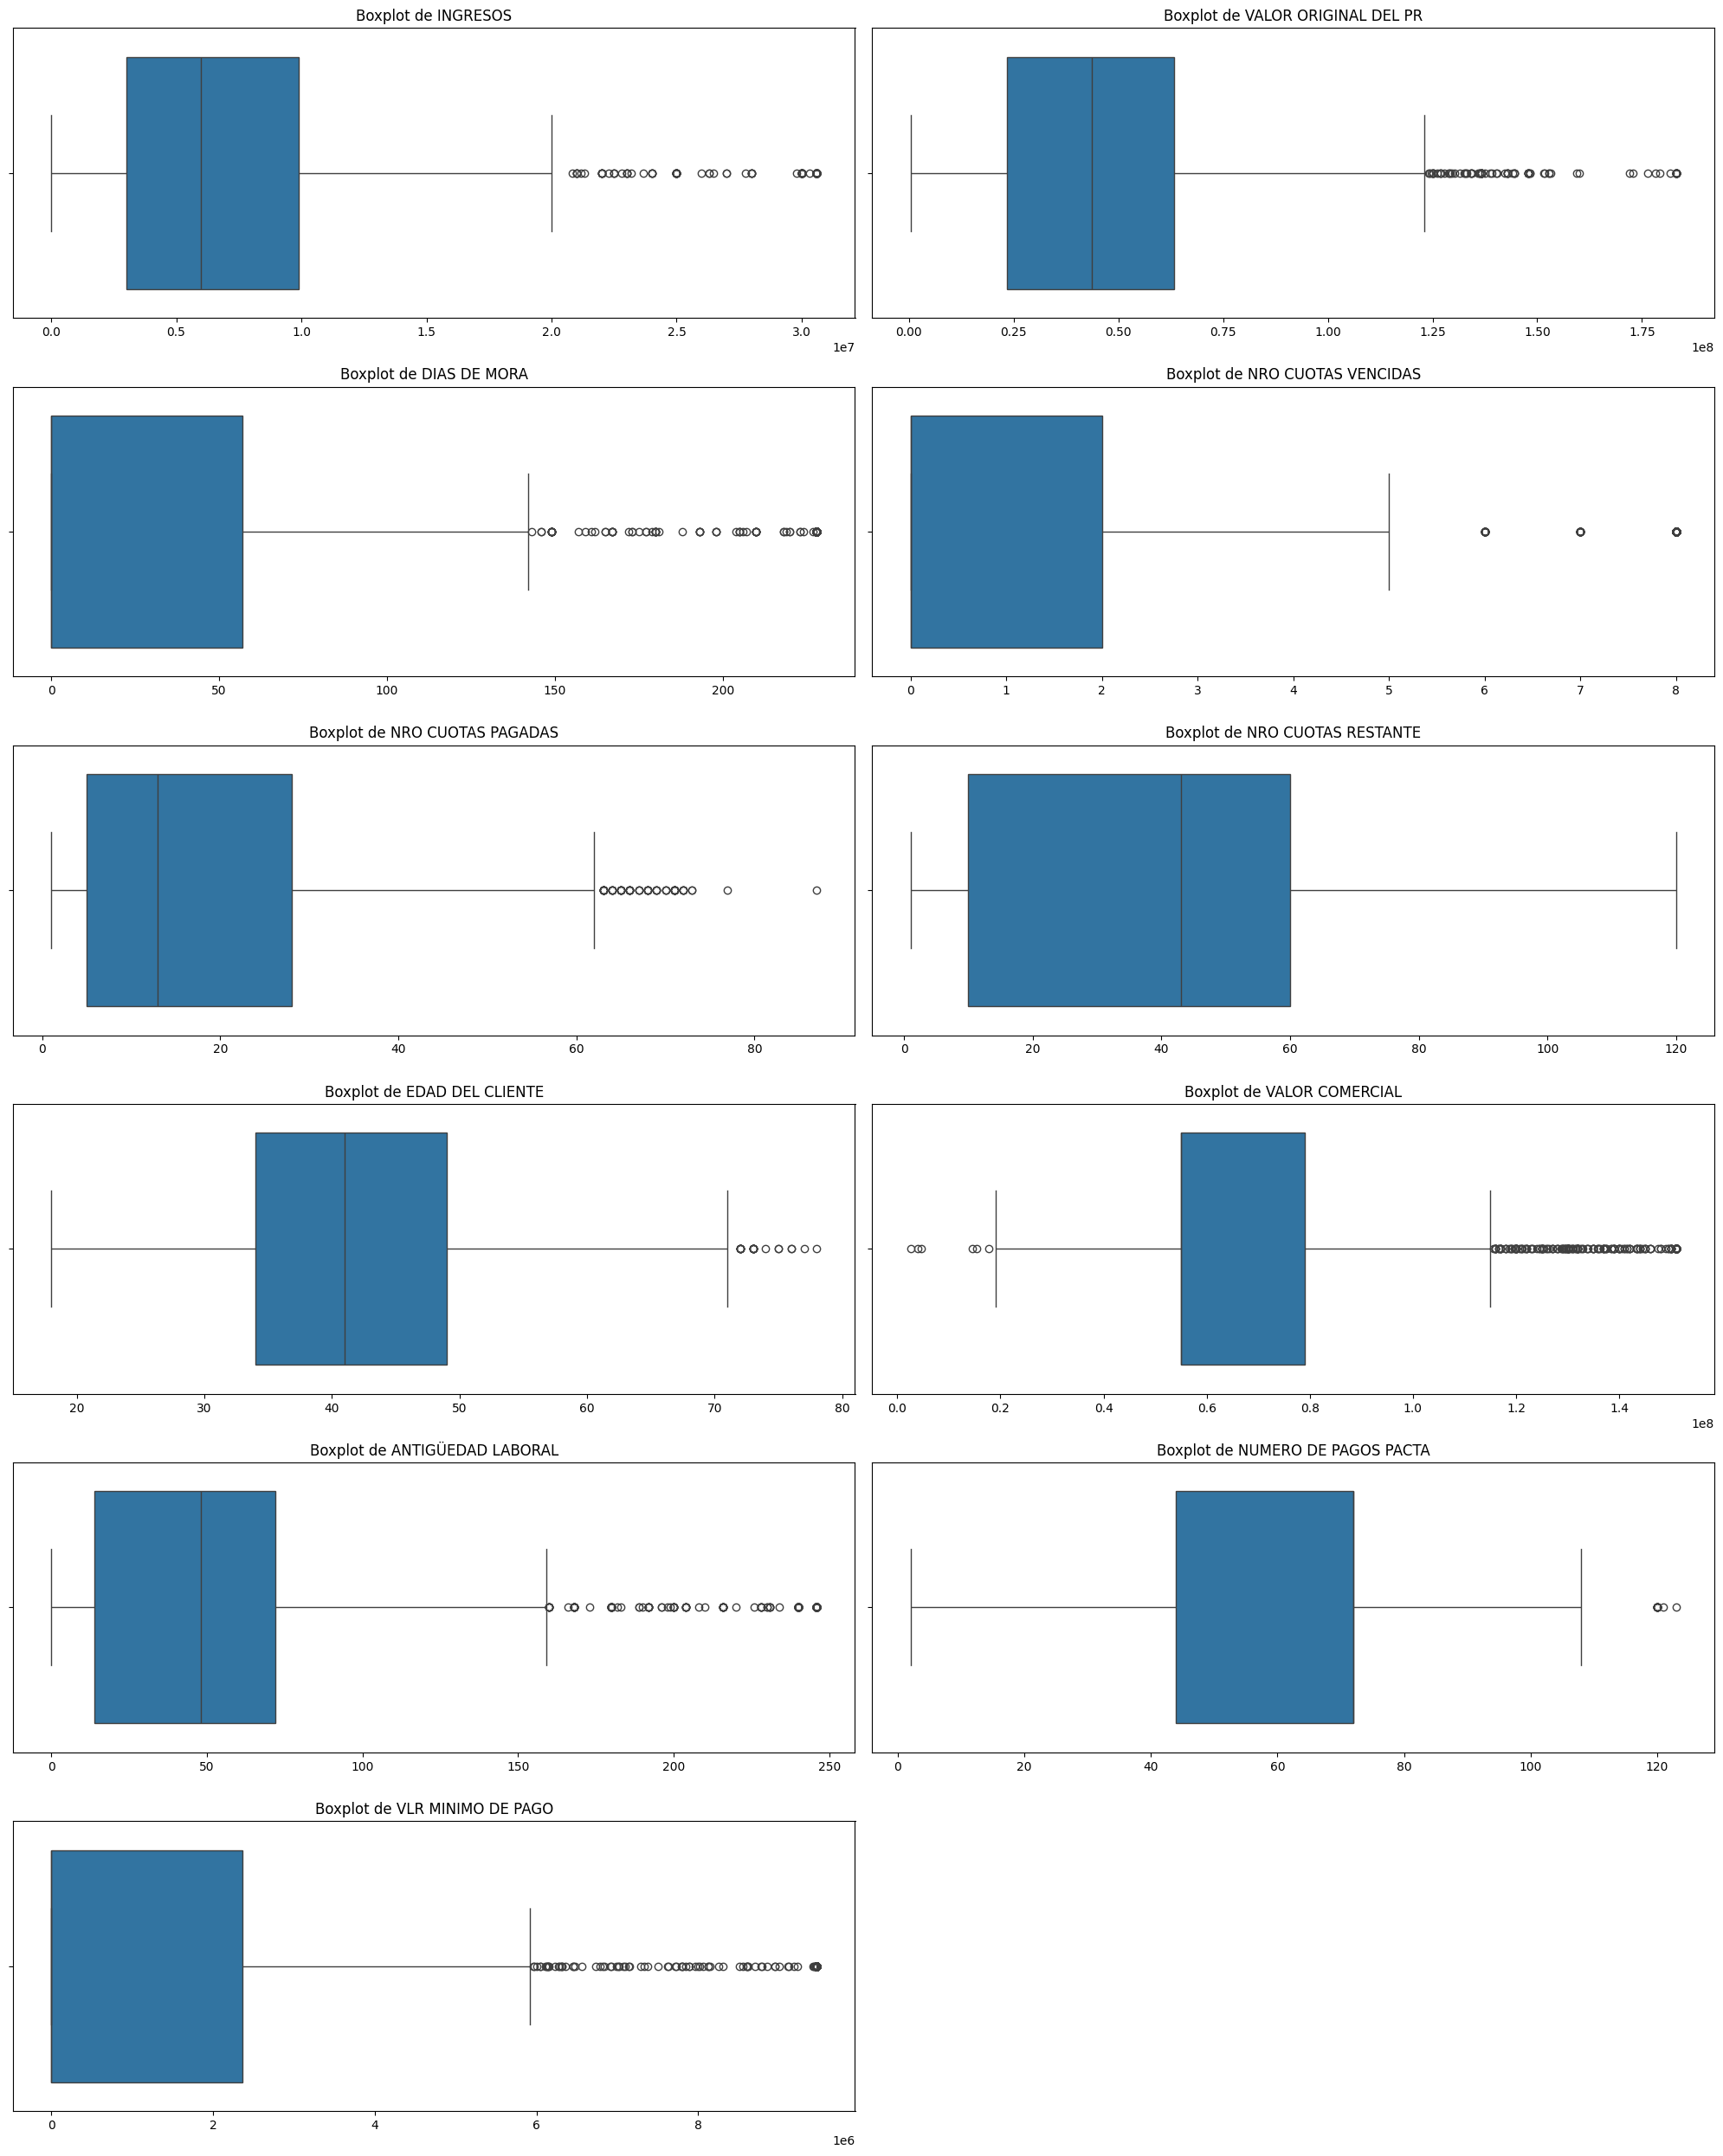

In [81]:
# Boxplots en subgráficos
plt.figure(figsize=(20, 25))

for i, col in enumerate(vars_numericas):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(x=df_cartera[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

### **2. Transformacion y codificacion de variables**

#### Transformacion variables tipo fecha

In [82]:
# Lista de columnas de fecha
columnas_fecha = [
    'FECHA APERTURA DEL PR',
    'FECHA DE DESEMBOLSO',
    'FEC CUOTA MAS ANTIG PENDIENTE DE PAGO',
    'FEC PROX PAGO',
    'FECHA EFEC ULTIMO PAGO'
]

# Conversión segura de enteros/floats a datetime
for col in columnas_fecha:
    df_cartera[col] = pd.to_datetime(df_cartera[col].dropna().astype(int).astype(str), format="%Y%m%d", errors='coerce')
    df_cartera[col] = df_cartera[col].fillna(pd.NaT)

# Fecha actual
hoy = pd.to_datetime("today")

# Variables derivadas de las fechas
df_cartera['ANTIGUEDAD_CREDITO_MESES'] = (hoy - df_cartera['FECHA APERTURA DEL PR']).dt.days // 30
df_cartera['DIAS_DESDE_ULTIMO_PAGO'] = (hoy - df_cartera['FECHA EFEC ULTIMO PAGO']).dt.days
df_cartera['DIAS_HASTA_PROX_PAGO'] = (df_cartera['FEC PROX PAGO'] - hoy).dt.days
df_cartera['DIAS_CUOTA_PENDIENTE'] = (hoy - df_cartera['FEC CUOTA MAS ANTIG PENDIENTE DE PAGO']).dt.days
df_cartera['ANIO_DESEMBOLSO'] = df_cartera['FECHA DE DESEMBOLSO'].dt.year
df_cartera['MES_DESEMBOLSO'] = df_cartera['FECHA DE DESEMBOLSO'].dt.month



In [83]:
# Eliminar columnas de fecha originales
df_cartera.drop(columns=columnas_fecha, inplace=True)

In [91]:
# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Opcional: también puedes ajustar el ancho máximo por columna si se corta el contenido
pd.set_option('display.max_colwidth', None)

# Ahora imprime tu DataFrame
df_cartera.head()

,NUMERO DE LA COLOCACION2,NUMERO DE IDENTIFICACION DEUDOR,NUMERO DEL PRODUCTO,NUMERO DE LA AGENCIA,PLAZO EN DIAS,NUMERO DE PAGOS PACTA,VALOR ORIGINAL DEL PR,CAPITAL PEND POR FACT,SALDO DEL PRESTAMO,NRO PLAN PAGOS VIGENT,NRO DE UTILIZACINES D,DIAS DE MORA,VLR ULTIMO PAGO,VLR TASA,VLR CUOTA MES,VLR MINIMO DE PAGO,DIA VENCIMIENTO CUOTA,NRO CUOTAS VENCIDAS,NRO CUOTAS PAGADAS,NRO CUOTAS RESTANTE,ESTADO CIVIL,SEXO,EDAD DEL CLIENTE,NUMERO DE SOLICITUD TITULAR,PERFIL DEL TITULAR,CIUDAD VITRINA,MODELO,SERVICIO,VALOR COMERCIAL,VALOR CUOTAS VENCIDAS,VALOR CAPITAL CUOTAS VENCIDAS,VALOR SOLICITADO,ASESOR DE DESEMBOLSO,ASESOR DE VENTAS,TASA DE MORA,ACIERTA,ANTIGÜEDAD LABORAL,NUMERO DE PERSONAS A CARGO,INGRESOS,ANTIGUEDAD_CREDITO_MESES,DIAS_DESDE_ULTIMO_PAGO,DIAS_HASTA_PROX_PAGO,DIAS_CUOTA_PENDIENTE,ANIO_DESEMBOLSO,MES_DESEMBOLSO,CALIFICACION CARTERA_B,CALIFICACION CARTERA_C,CALIFICACION CARTERA_D,CALIFICACION CARTERA_E,CALIFICACION CARTERA_IN,NIVEL DE ESTUDIOS_BASICA PRIMARIA,NIVEL DE ESTUDIOS_ESPECIALIZACION,NIVEL DE ESTUDIOS_MAESTRA,NIVEL DE ESTUDIOS_NO REGISTRA,NIVEL DE ESTUDIOS_PROFESIONAL,NIVEL DE ESTUDIOS_TECNICO,NIVEL DE ESTUDIOS_TECNICO PROFESIONAL,NIVEL DE ESTUDIOS_TECNOLOGICO,TIPO DE SOLICITANTE_INDEPENDIENTE,TIPO DE SOLICITANTE_SIN INFORMACION,TIPO DE SOLICITANTE_TAXISTA,TIPO DE SOLICITANTE_TRANSPORTADOR,TIPO DE ID_CEDULA,TIPO DE ID_CEDULA DE EXTRANJERIA,TIPO DE ID_ERROR DE REGISTRO,TIPO DE ID_NIT,TIPO DE ID_SIN INFORMACION,TIPO DE ID_SOCIEDAD EXTRANJERA SIN NIT EN COLOMBIA,OCUPACIÓN_COMERCIANTE,OCUPACIÓN_OTRO,OCUPACIÓN_PROFESIONAL INDEPENDIENTE,OCUPACIÓN_RENTISTA DE CAPITAL,OCUPACIÓN_SIN INFORMACION,TIPO DE VIVIENDA_FAMILIAR,TIPO DE VIVIENDA_PROPIA,TIPO DE VIVIENDA_SIN INFORMACION,TIPO DE VEHICULO_OPERACIÓN ANULADA,TIPO DE VEHICULO_PRODUCTO DIFERENTE DE VEHICULO,TIPO DE VEHICULO_USADO,TIPO DE SERVICIO_PARTICULAR,TIPO DE SERVICIO_PRODUCTO DIFERENTE DE VEHICULO,TIPO DE SERVICIO_PUBLICO,CREDITO EN MORA_Si,MARCA_FREQ,CLASE_FREQ,PRODUCTO_FREQ
0,90,52743777,905,223,2160,72,50000000.0,0.0,19879034.0,2,43.0,228,40880000.0,15.98540,102006,9465358,2,8,24.0,48,7.0,2.0,43.0,417,2.0,11001.0,2017.0,1.0,58290000.0,0,0,50000000.0,999.0,52120498.0,25.62,0,60,0,6800000,92,2018,-1409,1986,2017,9,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,0.721733,0.728165,0.099865
1,148,80138994,905,222,1800,60,42850000.0,0.0,9995618.0,1,45.0,228,34160000.0,20.99295,510642,9465358,15,8,35.0,25,7.0,1.0,42.0,1931,2.0,11001.0,2018.0,1.0,51350000.0,0,0,42850000.0,999.0,86073164.0,25.62,0,50,0,7650000,91,1644,-1335,1607,2017,10,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,0.721733,0.728165,0.099865
2,185,1020770824,905,203,1800,60,33975000.0,0.0,32849398.0,1,59.0,228,2000000.0,25.06553,195105,9465358,22,8,3.0,57,1.0,1.0,32.0,2609,1.0,11001.0,2018.0,1.0,37750000.0,0,0,33975000.0,19.0,80239245.0,25.62,0,9,0,3516860,90,2443,-902,2576,2017,11,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,0.721733,0.728165,0.099865
3,209,53055560,905,223,1800,60,34965000.0,0.0,5398135.0,1,29.0,228,27920000.0,18.67224,123058,9465358,24,7,22.0,38,2.0,2.0,39.0,2460,2.0,25290.0,2018.0,1.0,38850000.0,0,0,34965000.0,8.0,52580917.0,25.62,0,120,0,10000000,90,2048,-1813,1995,2017,11,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,0.721733,0.728165,0.099865
4,295,1030557061,905,223,2160,72,35865000.0,0.0,1814

#### Codificación variables categoricas

In [84]:
# Separar categóricas
cat_cols = df_cartera.select_dtypes(include='object').columns

# Contar categorías por variable
categoria_por_columna = df_cartera[cat_cols].nunique()

# Dividir en variables con pocas y muchas categorías
pocas_categorias = categoria_por_columna[categoria_por_columna <= 10].index.tolist()
muchas_categorias = categoria_por_columna[categoria_por_columna > 10].index.tolist()

# ----------------------
# One-Hot Encoding para variables con pocas categorías
# ----------------------
df_cartera = pd.get_dummies(df_cartera, columns=pocas_categorias, drop_first=True)

# ----------------------
# Frequency Encoding para muchas categorías
# ----------------------
for col in muchas_categorias:
    freqs = df_cartera[col].value_counts(normalize=True)
    df_cartera[col + '_FREQ'] = df_cartera[col].map(freqs)

# Opcional: eliminar las columnas originales después de codificarlas
df_cartera.drop(columns=muchas_categorias, inplace=True)


In [85]:
df_cartera.shape

(2954, 86)

#### Normalizacion variables numericas

In [86]:
# Detectar automáticamente columnas numéricas (excluyendo categóricas ya codificadas)
variables_numericas = df_cartera.select_dtypes(include=['int64', 'float64']).columns.tolist()

# excluir columnas que no deseas escalar (como variables target o identificadores)
excluir = ['CREDITO EN MORA', 'NUMERO DE LA COLOCACION2', 'NUMERO DE IDENTIFICACION DEUDOR']
variables_numericas = [col for col in variables_numericas if col not in excluir]

# ⚙️ Escalar
scaler = StandardScaler()
df_cartera_scaled = df_cartera.copy()
df_cartera_scaled[variables_numericas] = scaler.fit_transform(df_cartera[variables_numericas])

print("Variables numéricas detectadas y escaladas automáticamente.")


Variables numéricas detectadas y escaladas automáticamente.


In [88]:
df_cartera_scaled.shape

(2954, 86)

In [89]:
# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Opcional: también puedes ajustar el ancho máximo por columna si se corta el contenido
pd.set_option('display.max_colwidth', None)

# Ahora imprime tu DataFrame
df_cartera_scaled.head()

,NUMERO DE LA COLOCACION2,NUMERO DE IDENTIFICACION DEUDOR,NUMERO DEL PRODUCTO,NUMERO DE LA AGENCIA,PLAZO EN DIAS,NUMERO DE PAGOS PACTA,VALOR ORIGINAL DEL PR,CAPITAL PEND POR FACT,SALDO DEL PRESTAMO,NRO PLAN PAGOS VIGENT,NRO DE UTILIZACINES D,DIAS DE MORA,VLR ULTIMO PAGO,VLR TASA,VLR CUOTA MES,VLR MINIMO DE PAGO,DIA VENCIMIENTO CUOTA,NRO CUOTAS VENCIDAS,NRO CUOTAS PAGADAS,NRO CUOTAS RESTANTE,ESTADO CIVIL,SEXO,EDAD DEL CLIENTE,NUMERO DE SOLICITUD TITULAR,PERFIL DEL TITULAR,CIUDAD VITRINA,MODELO,SERVICIO,VALOR COMERCIAL,VALOR CUOTAS VENCIDAS,VALOR CAPITAL CUOTAS VENCIDAS,VALOR SOLICITADO,ASESOR DE DESEMBOLSO,ASESOR DE VENTAS,TASA DE MORA,ACIERTA,ANTIGÜEDAD LABORAL,NUMERO DE PERSONAS A CARGO,INGRESOS,ANTIGUEDAD_CREDITO_MESES,DIAS_DESDE_ULTIMO_PAGO,DIAS_HASTA_PROX_PAGO,DIAS_CUOTA_PENDIENTE,ANIO_DESEMBOLSO,MES_DESEMBOLSO,CALIFICACION CARTERA_B,CALIFICACION CARTERA_C,CALIFICACION CARTERA_D,CALIFICACION CARTERA_E,CALIFICACION CARTERA_IN,NIVEL DE ESTUDIOS_BASICA PRIMARIA,NIVEL DE ESTUDIOS_ESPECIALIZACION,NIVEL DE ESTUDIOS_MAESTRA,NIVEL DE ESTUDIOS_NO REGISTRA,NIVEL DE ESTUDIOS_PROFESIONAL,NIVEL DE ESTUDIOS_TECNICO,NIVEL DE ESTUDIOS_TECNICO PROFESIONAL,NIVEL DE ESTUDIOS_TECNOLOGICO,TIPO DE SOLICITANTE_INDEPENDIENTE,TIPO DE SOLICITANTE_SIN INFORMACION,TIPO DE SOLICITANTE_TAXISTA,TIPO DE SOLICITANTE_TRANSPORTADOR,TIPO DE ID_CEDULA,TIPO DE ID_CEDULA DE EXTRANJERIA,TIPO DE ID_ERROR DE REGISTRO,TIPO DE ID_NIT,TIPO DE ID_SIN INFORMACION,TIPO DE ID_SOCIEDAD EXTRANJERA SIN NIT EN COLOMBIA,OCUPACIÓN_COMERCIANTE,OCUPACIÓN_OTRO,OCUPACIÓN_PROFESIONAL INDEPENDIENTE,OCUPACIÓN_RENTISTA DE CAPITAL,OCUPACIÓN_SIN INFORMACION,TIPO DE VIVIENDA_FAMILIAR,TIPO DE VIVIENDA_PROPIA,TIPO DE VIVIENDA_SIN INFORMACION,TIPO DE VEHICULO_OPERACIÓN ANULADA,TIPO DE VEHICULO_PRODUCTO DIFERENTE DE VEHICULO,TIPO DE VEHICULO_USADO,TIPO DE SERVICIO_PARTICULAR,TIPO DE SERVICIO_PRODUCTO DIFERENTE DE VEHICULO,TIPO DE SERVICIO_PUBLICO,CREDITO EN MORA_Si,MARCA_FREQ,CLASE_FREQ,PRODUCTO_FREQ
0,90,52743777,2.313804,-0.243710,0.544916,0.562843,0.104653,-0.970596,-0.482188,-0.170694,1.667451,1.922145,3.630721,-2.240196,-0.543483,2.289009,-0.986456,2.312663,0.335555,0.363063,0.856575,1.249805,0.030077,-1.251313,0.687077,-0.508092,-0.559411,-0.278293,-0.323562,-0.792234,-0.507901,-0.011866,1.632589,-1.335375,0.018402,-1.996570,-0.005606,-0.178999,-0.089850,2.322859,3.638166,-2.774752,2.723369,2017,9,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,0.619625,0.602379,-0.995035
1,148,80138994,2.313804,-0.248522,0.099298,0.114168,-0.100307,-0.970596,-0.767792,-0.260287,1.792561,1.922145,2.970382,-0.340610,-0.395282,2.289009,0.470203,2.312663,0.984653,-0.532007,0.856575,-0.800125,-0.060491,-1.207522,0.687077,-0.508092,-0.442996,-0.278293,-0.571619,-0.792234,-0.507901,-0.298316,1.632589,-1.256072,0.018402,-1.996570,-0.167321,-0.178999,0.033624,2.286507,2.891230,-2.613361,2.131212,2017,10,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,0.619625,0.602379,-0.995035
2,185,1020770824,2.313804,-0.339943,0.099298,0.114168,-0.354715,-0.970596,-0.107380,-0.260287,2.668332,1.922145,-0.189812,1.204301,-0.509718,2.289009,1.254558,2.312663,-0.903631,0.713309,-1.317864,-0.800125,-0.966166,-1.187912,-0.479375,-0.508092,-0.442996,-0.278293,-1.057724,-0.792234,-0.507901,-0.653876,-0.186443,-1.269698,0.018402,-1.996570,-0.830353,-0.178999,-0.566772,2.250155,4.486957,-1.669008,3.645197,2017,11,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,0.619625,0.602379,-0.995035
3,209,53055560,2.313804,-0.243710,

In [90]:
#descargar el archivo en carpeta de descargas
df_cartera_scaled.to_csv(r"C:\Users\USER\OneDrive - universidadean.edu.co\2. Semestre\Seminario de investigación\Modulo 2\Modelo ML\data\processed\df_cartera_scaled.csv", index=False)